## Classification with Naive Bayes
Simple demo from sklearn-dataset on cancer

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_breast_cancer()

# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

# Look at our data
print(label_names)
print('Class label = ', labels[0])
print(feature_names)
print(features[0])



['malignant' 'benign']
Class label =  0
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


Read more -> [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) <- Read more

In [6]:
# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]
0.9414893617021277


## SVM

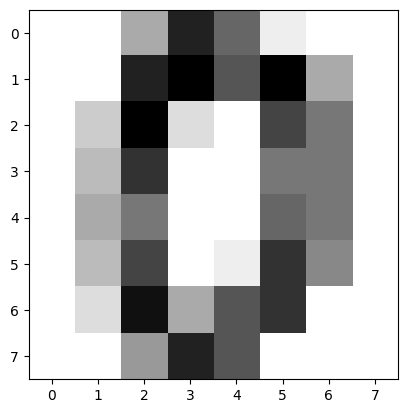

1797


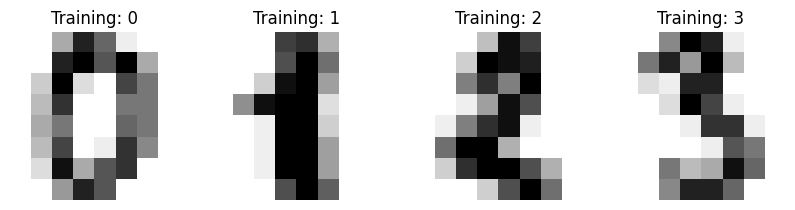

In [10]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn import svm
from sklearn import metrics


# the digits dataset stores grayscale images of size 8x8 pixels
digits = datasets.load_digits()
# If we try printing the dataset we can see that it is actually a dictionary
#print(digits) # FROM HERE TO
# And by accessing the key data and the first index of that value we can find the first digit
#print(digits['data'][0])

# if we shape this into a matrice of 8 x 8 pixels, we can display the image:
# To further enhance the image we can switch to a grayscale color-map using cmap=plt.cm.gray_r (there are lots of color maps)
image = np.array(digits['data'][0]).reshape(8,8)
#print(image)
plt.imshow(image, cmap=plt.cm.gray_r)
# So here we have the number 0 (one of them)
plt.show()
# There are 1797 images in the dataset
print(len(digits['data']))

# The underscore is used to ignore a parameter (we don't need the figure) 
# Underscore is used in the interpreter to save the last value
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# The zip-function acts like a zipper, so it will take one value from axes, digits.images and digits.target and join as a new Tuple
for ax, image, label in zip(axes, digits.images, digits.target):
    # Make sure we don't have x,y axis
    ax.set_axis_off()
    # Prepare the image (we don't show it yet)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Set the title for this subplot. The %i is substituted by an integer (label) which is the number that the image represents
    ax.set_title('Training: %i' % label)
# can show plot
plt.show()



Statistics for classifier SVC(C=10, degree=4, gamma=0.0001, kernel='poly'):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.94      0.94      0.94        36
           2       1.00      1.00      1.00        35
           3       0.96      0.68      0.79        37
           4       0.97      0.92      0.94        37
           5       0.86      1.00      0.93        37
           6       1.00      0.97      0.99        37
           7       0.85      0.97      0.91        36
           8       0.78      0.85      0.81        33
           9       0.89      0.92      0.91        37

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360




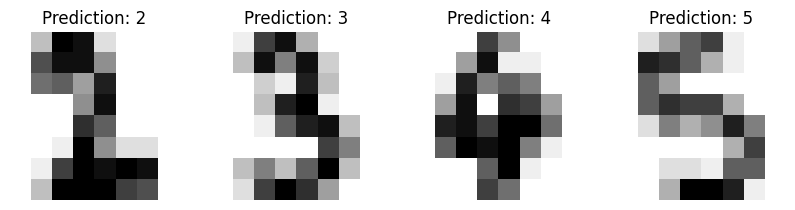

In [11]:
# In order to train this model we have to have a one-dimensionel array of each image, so we are going to flatten them
# Find number of images
n_samples = len(digits.images)
# reshape so that every row contains a separate image
data = digits.images.reshape((n_samples, -1))

# Now it's time to create a support vector classifier
# kernel, gamma, C and degree are parameters that can be tweaked
classifier = svm.SVC(kernel="poly",gamma=0.0001,C=10,degree=4)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

# Learn the digits on the train subset
# Fits the classifier
classifier.fit(X_train, y_train)

# Now we have a trained model, and we're going to try it on the test-set
# Predict the value of the digit on the test subset
predicted = classifier.predict(X_test)

# Let's display the results
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    # We have to reshape the images again to show them
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
 

print(f"Statistics for classifier {classifier}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")


